In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import random
import csv
import os

In [10]:
def count_png_images(directory_path):
    png_count = 0
    
    for root, dirs, files in tqdm(os.walk(directory_path), desc="Counting PNG files"):
        for file_name in files:
            if file_name.lower().endswith('.png'):
                png_count += 1
    return png_count

In [11]:
directory_path = "/n/data1/hms/dbmi/manrai/derm/generations-more/text-to-image/"
total_png_count = count_png_images(directory_path)
print(f"Total number of PNG files: {total_png_count}")

Counting PNG files: 948it [00:01, 698.69it/s]

Total number of PNG files: 378150


In [12]:
directory_path = "/n/data1/hms/dbmi/manrai/derm/generations-lots-more/text-to-image/"
total_png_count = count_png_images(directory_path)
print(f"Total number of PNG files: {total_png_count}")

Counting PNG files: 764it [00:11, 66.61it/s] 

Total number of PNG files: 251505


In [13]:
directory_path = "/n/data1/hms/dbmi/manrai/derm/generations"
total_png_count = count_png_images(directory_path)
print(f"Total number of PNG files: {total_png_count}")

Counting PNG files: 410it [00:36, 11.36it/s]

Total number of PNG files: 213930


In [15]:
directory_path = "/n/data1/hms/dbmi/manrai/derm/generations-pretrained"
total_png_count = count_png_images(directory_path)
print(f"Total number of PNG files: {total_png_count}")

Counting PNG files: 373it [00:00, 1281.50it/s]

Total number of PNG files: 107900


In [2]:
root_dir = "/n/data1/hms/dbmi/manrai/derm/synderm2024/complete_new"

entries = [entry for entry in os.scandir(root_dir) if entry.is_dir()]

counts = {}
for entry in entries:
    subfolder_count = 0

    with os.scandir(entry.path) as sub_it:
        file_bar = tqdm(desc=f"Processing files in {entry.name}")
        for f in sub_it:
            if f.is_file() and f.name.endswith('.png'):
                subfolder_count += 1
                file_bar.update(1)

    file_bar.close()  # Close the file progress bar
    count = subfolder_count
    print(f"Number of files found at {entry.name}: {count}")
    counts[entry.name] = count

csv_path = os.path.join('huggingface', 'folder_counts2.csv')
with open(csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Folder', 'Image Count'])
    for folder, count in counts.items():
        writer.writerow([folder, count])


Processing files in acne_finetune_text_to_image_text_to_image: 1260it [00:00, 2100.59it/s]


Number of files found at acne_finetune_text_to_image_text_to_image: 1260


Processing files in acne_vulgaris_finetune_text_to_image_text_to_image: 2540it [00:01, 1308.00it/s]


Number of files found at acne_vulgaris_finetune_text_to_image_text_to_image: 2540


Processing files in actinic_keratosis_finetune_text_to_image_text_to_image: 2940it [00:02, 1321.18it/s]


Number of files found at actinic_keratosis_finetune_text_to_image_text_to_image: 2940


Processing files in all_finetune_inpaint_inpaint: 35300it [02:25, 242.37it/s]


Number of files found at all_finetune_inpaint_inpaint: 35300


Processing files in all_finetune_inpaint_inpaint_outpaint: 35300it [02:31, 232.64it/s]


Number of files found at all_finetune_inpaint_inpaint_outpaint: 35300


Processing files in all_finetune_text_to_image_text_to_image: 65311it [09:56, 43.78it/s] 

KeyboardInterrupt: 

Processing files in all_finetune_text_to_image_text_to_image: 65519it [10:07, 43.78it/s]

In [3]:
df_size = pd.read_csv("huggingface/folder_counts2.csv")

In [4]:
df_size.sort_values('Image Count', ascending=False)

,Folder,Image Count
80,psoriasis_finetune_text_to_image_text_to_image,91848
5,all_finetune_text_to_image_text_to_image,88250
14,basal_cell_carcinoma_finetune_text_to_image_te...,78294
98,squamous_cell_carcinoma_finetune_text_to_image...,74410
40,lichen_planus_finetune_text_to_image_text_to_i...,64780
...,...,...
104,syringoma_finetune_text_to_image_text_to_image,630
107,tungiasis_finetune_text_to_image_text_to_image,620
65,papilomatosis_confluentes_and_reticulate_finet...,600
34,hailey_hailey_disease_finetune_text_to_image_t...,580


In [5]:
df_size["Image Count"].sum()

np.int64(1006821)

Sample images from psoriasis_finetune_text_to_image_text_to_image:
psoriasis_finetune_text_to_image_text_to_image_generations1_00_0ea6b66b99a74c576e71a912ba3a14e7.png
psoriasis_finetune_text_to_image_text_to_image_generations1_00_10b66b2883ce32100b262b712db1ec8b.png
psoriasis_finetune_text_to_image_text_to_image_generations1_00_0b4cfa84dbea86bdfad0915394b2132a.png
psoriasis_finetune_text_to_image_text_to_image_generations1_00_1027a8869e5313e5ab7e2e2848fdb2e6.png
psoriasis_finetune_text_to_image_text_to_image_generations1_00_2bd51eeec33997f3619f78356f3b993f.png
psoriasis_finetune_text_to_image_text_to_image_generations1_00_1d1e43151f411b24f1d5886ffbb153ff.png
psoriasis_finetune_text_to_image_text_to_image_generations1_00_1e71698eb01fdd1a14e643fe31aa9b17.png
psoriasis_finetune_text_to_image_text_to_image_generations1_00_19681239bfc49bfab40bf8923ae07dd8.png
psoriasis_finetune_text_to_image_text_to_image_generations1_00_2b2c04580d3c5f11110785cf328e3e51.png
psoriasis_finetune_text_to_image_

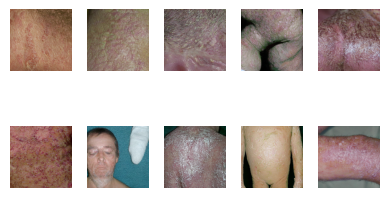

In [25]:
root_dir = "/n/data1/hms/dbmi/manrai/derm/synderm2024/complete_new"
target_dir = os.path.join(root_dir, "psoriasis_finetune_text_to_image_text_to_image")

# Use scandir and break after finding 100 files
image_files = []
with os.scandir(target_dir) as it:
    for entry in it:
        if entry.is_file() and entry.name.endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(entry.name)
            if len(image_files) >= 100:
                break

# Randomly sample 10 images from the first 100 found
sample_images = random.sample(image_files, 10)

print("Sample images from psoriasis_finetune_text_to_image_text_to_image:")

# Create a figure with a 2x5 grid
plt.figure(figsize=(4, 3))
for i, img_name in enumerate(sample_images):
    print(img_name)
    img_path = os.path.join(target_dir, img_name)
    img = plt.imread(img_path)
    
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

psoriasis_finetune_text_to_image_text_to_image_generations1_00_2bd51eeec33997f3619f78356f3b993f.png
psoriasis_finetune_text_to_image_text_to_image_generations1_01_2bd51eeec33997f3619f78356f3b993f.png
psoriasis_finetune_text_to_image_text_to_image_generations1_02_2bd51eeec33997f3619f78356f3b993f.png
psoriasis_finetune_text_to_image_text_to_image_generations1_03_2bd51eeec33997f3619f78356f3b993f.png
psoriasis_finetune_text_to_image_text_to_image_generations1_04_2bd51eeec33997f3619f78356f3b993f.png
psoriasis_finetune_text_to_image_text_to_image_generations1_05_2bd51eeec33997f3619f78356f3b993f.png
psoriasis_finetune_text_to_image_text_to_image_generations1_06_2bd51eeec33997f3619f78356f3b993f.png
psoriasis_finetune_text_to_image_text_to_image_generations1_07_2bd51eeec33997f3619f78356f3b993f.png
psoriasis_finetune_text_to_image_text_to_image_generations1_08_2bd51eeec33997f3619f78356f3b993f.png
psoriasis_finetune_text_to_image_text_to_image_generations1_09_2bd51eeec33997f3619f78356f3b993f.png


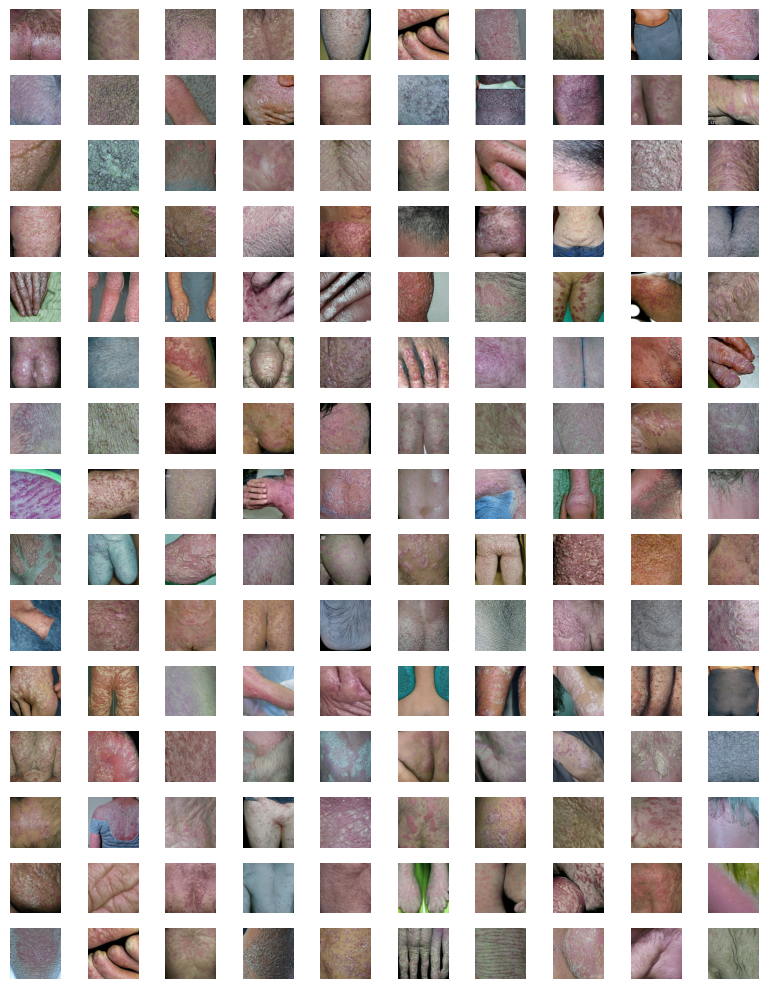

In [43]:
root_dir = "/n/data1/hms/dbmi/manrai/derm/synderm2024/complete_new"
target_dir = os.path.join(root_dir, "psoriasis_finetune_text_to_image_text_to_image")

#suffix_test = "0ea6b66b99a74c576e71a912ba3a14e7.png"
suffix_test = "2bd51eeec33997f3619f78356f3b993f.png"

# Find first 3 images with matching suffix
matching_images = []
with os.scandir(target_dir) as it:
    for entry in it:
        if entry.is_file() and entry.name.endswith(suffix_test):
            matching_images.append(entry.name)
            print(entry.name)
            if len(matching_images) >= 150:
                break

print(f"Found {len(matching_images)} images ending with {suffix_test}:")


# Create a figure with a 2x5 grid
plt.figure(figsize=(8, 10))
for i, img_name in enumerate(matching_images):
    img_path = os.path.join(target_dir, img_name)
    img = plt.imread(img_path)
    
    plt.subplot(15, 10, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()